In [44]:
import os
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Reg_data.csv')

In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,2,10397,13930,31.0,2019,17.0,1900,0.067797,0.727778,0.031915,0.0,0.5,0.596774,0.86,0.711340,0.582192,0.814433,1
1,2017,12,3,12892,14107,26.0,2029,32.0,1800,0.169492,0.669444,0.010638,0.0,0.5,0.483871,0.52,0.721649,0.554795,0.917526,1
2,2017,12,3,14771,12892,341.0,930,325.0,800,0.135593,0.886111,0.000000,0.0,0.5,0.612903,0.02,0.608247,0.493151,0.752577,1
3,2017,12,3,14771,14747,311.0,1440,286.0,1200,0.186441,0.908333,0.000000,0.0,0.5,0.645161,0.00,0.597938,0.513699,0.659794,1
4,2017,12,3,12892,14771,24.0,1836,5.0,1700,0.186441,0.652778,0.010638,0.0,0.5,0.500000,0.53,0.721649,0.561644,0.907216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303179,2016,1,3,10397,11292,33.0,10,5.0,2200,0.220339,0.844444,0.000000,0.0,0.5,0.548387,0.28,0.515464,0.445205,0.670103,1
303180,2016,1,3,13303,10397,26.0,2132,30.0,1900,0.152542,0.586111,0.223404,0.0,0.5,0.451613,0.69,0.886598,0.712329,0.762887,1
303181,2016,1,3,14107,11292,42.0,2259,39.0,2100,0.288136,0.211111,0.031915,0.0,0.5,0.467742,0.99,0.546392,0.595890,0.402062,1
303182,2016,1,3,11292,14107,58.0,2024,53.0,1900,0.084746,0.480556,0.521277,0.0,0.0,0.758065,1.00,0.402062,0.308219,1.000000,1


In [114]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'CRSArrTime', 'ArrDelayMinutes', 'Time',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindChillF',
       'humidity', 'pred_del', 'pred_minutes', 'interval'],
      dtype='object')

In [5]:
df['pred_del'] , df['ArrDelayMinutes']

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 303179    1
 303180    1
 303181    1
 303182    1
 303183    1
 Name: pred_del, Length: 303184, dtype: int64,
 0          17.0
 1          32.0
 2         325.0
 3         286.0
 4           5.0
           ...  
 303179      5.0
 303180     30.0
 303181     39.0
 303182     53.0
 303183     67.0
 Name: ArrDelayMinutes, Length: 303184, dtype: float64)

In [113]:
df['pred_del'].value_counts()

pred_del
1    303184
Name: count, dtype: int64

In [6]:
X = df.drop(['ArrDelayMinutes','pred_del'], axis=1)  
y = df['ArrDelayMinutes']  

In [7]:
X

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
0,2017,12,2,10397,13930,31.0,2019,1900,0.067797,0.727778,0.031915,0.0,0.5,0.596774,0.86,0.711340,0.582192,0.814433
1,2017,12,3,12892,14107,26.0,2029,1800,0.169492,0.669444,0.010638,0.0,0.5,0.483871,0.52,0.721649,0.554795,0.917526
2,2017,12,3,14771,12892,341.0,930,800,0.135593,0.886111,0.000000,0.0,0.5,0.612903,0.02,0.608247,0.493151,0.752577
3,2017,12,3,14771,14747,311.0,1440,1200,0.186441,0.908333,0.000000,0.0,0.5,0.645161,0.00,0.597938,0.513699,0.659794
4,2017,12,3,12892,14771,24.0,1836,1700,0.186441,0.652778,0.010638,0.0,0.5,0.500000,0.53,0.721649,0.561644,0.907216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303179,2016,1,3,10397,11292,33.0,10,2200,0.220339,0.844444,0.000000,0.0,0.5,0.548387,0.28,0.515464,0.445205,0.670103
303180,2016,1,3,13303,10397,26.0,2132,1900,0.152542,0.586111,0.223404,0.0,0.5,0.451613,0.69,0.886598,0.712329,0.762887
303181,2016,1,3,14107,11292,42.0,2259,2100,0.288136,0.211111,0.031915,0.0,0.5,0.467742,0.99,0.546392,0.595890,0.402062
303182,2016,1,3,11292,14107,58.0,2024,1900,0.084746,0.480556,0.521277,0.0,0.0,0.758065,1.00,0.402062,0.308219,1.000000


In [8]:
y

0          17.0
1          32.0
2         325.0
3         286.0
4           5.0
          ...  
303179      5.0
303180     30.0
303181     39.0
303182     53.0
303183     67.0
Name: ArrDelayMinutes, Length: 303184, dtype: float64

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [112]:
X_train.shape,y_train.shape

((212228, 18), (212228,))

**Linear Regression**

In [11]:
Lirmodel = LinearRegression()
print("running")
Lirmodel.fit(X_train,y_train)
print("predicting")
Lirmodel_pred = Lirmodel.predict(X_test)
print("completed")

running
predicting
completed


In [12]:
Lirmodel.score(X_test,y_test)

0.9432614019109185

In [13]:
Lirmodel.score(X,y)

0.9454876448658742

In [14]:
Lirmodel_pred = Lirmodel.predict(X)

In [15]:
Lirmodel_pred.shape

(303184,)

In [39]:
Lirmodel_pred = Lirmodel.predict(X_test)

In [45]:
mae = mean_absolute_error(y_test, Lirmodel_pred)
mse = mean_squared_error(y_test, Lirmodel_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Lirmodel_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 13.093547924915864
Mean Squared Error (MSE): 344.3991389526278
Root Mean Squared Error (RMSE): 18.557993936647026
R-squared (R²): 0.9432614019109185


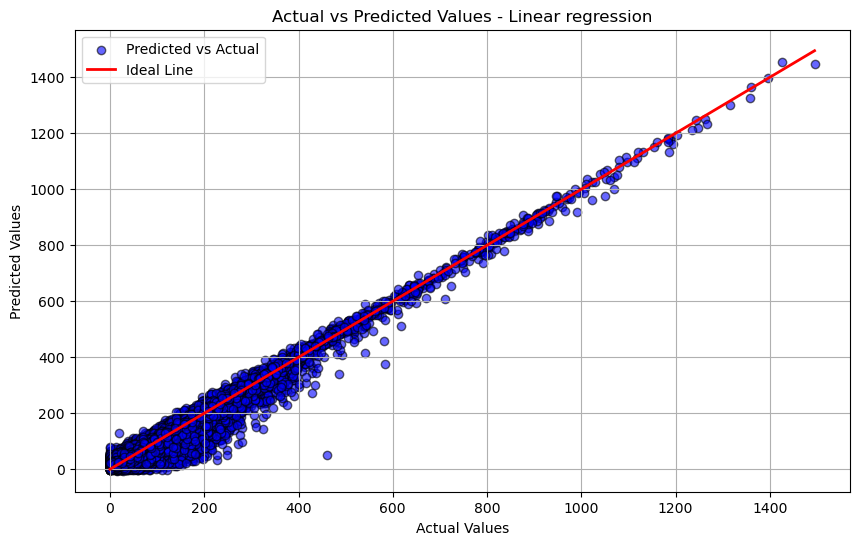

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Lirmodel_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Linear regression')
plt.legend()
plt.grid(True)
plt.show()

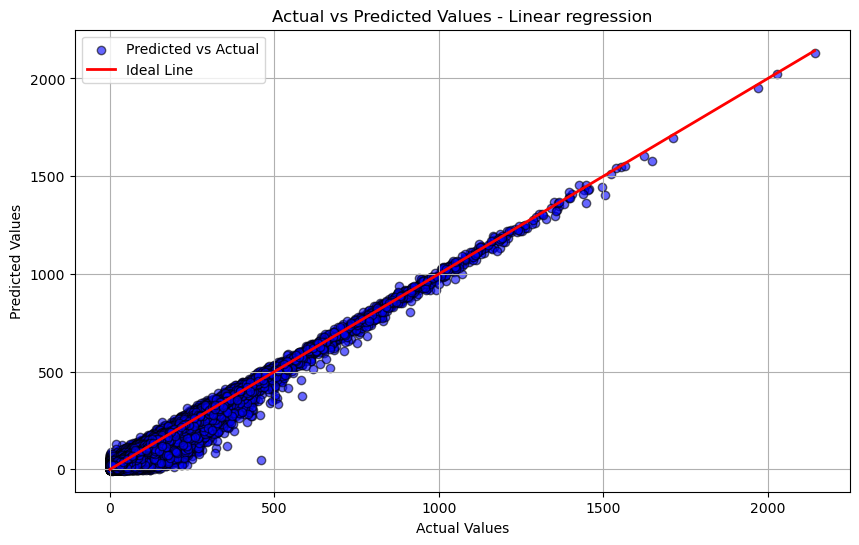

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y, Lirmodel_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Linear regression')
plt.legend()
plt.grid(True)
plt.show()

**Extra Trees Regressor**

In [18]:
print("starting")
etrmodel = ExtraTreesRegressor()
print("running")
etrmodel.fit(X_train, y_train)
print("Predicting")
etrpred = etrmodel.predict(X_test)
print("completed")

starting
running
Predicting
completed


In [19]:
etrmodel.score(X_test,y_test)

0.9453297606201767

In [20]:
etrmodel.score(X,y)

0.9841398599195064

In [47]:
etrpred = etrmodel.predict(X_test)

In [48]:
mae = mean_absolute_error(y_test, etrpred)
mse = mean_squared_error(y_test, etrpred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, etrpred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 13.01294054267998
Mean Squared Error (MSE): 331.84435292504065
Root Mean Squared Error (RMSE): 18.216595536077552
R-squared (R²): 0.9453297606201767


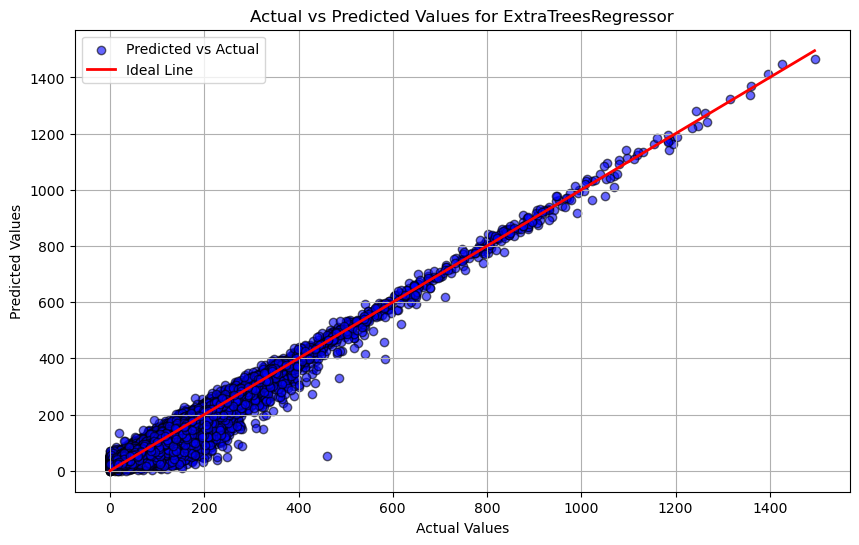

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, etrpred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for ExtraTreesRegressor')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
etrpred = etrmodel.predict(X)

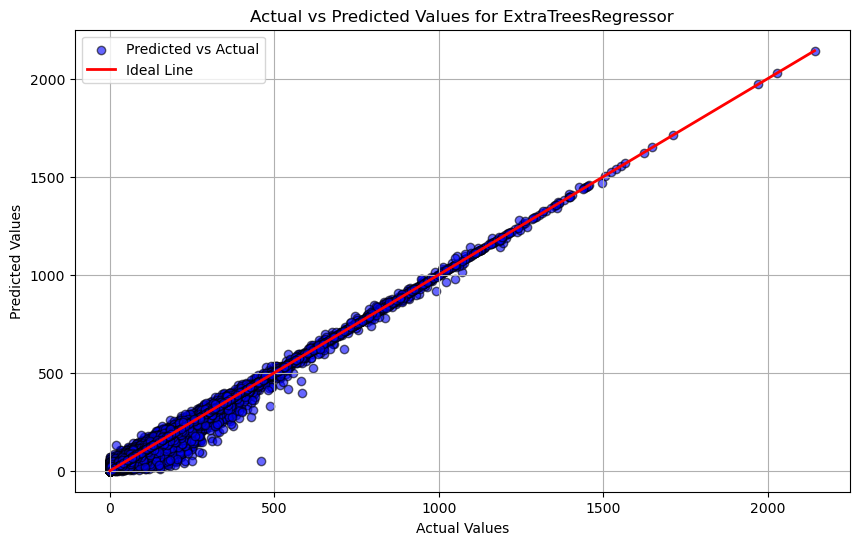

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y, etrpred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for ExtraTreesRegressor')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest Regressor**

In [26]:
print("starting")
rfr_model = RandomForestRegressor()  
print("running")
rfr_model.fit(X_train, y_train)
print("predicting")
rfr_pred = rfr_model.predict(X_test)
print("completed")

starting
running
predicting
completed


In [27]:
rfr_model.score(X_test,y_test)

0.9458698671775737

In [28]:
rfr_model.score(X,y)

0.9792094723022129

In [36]:
rfr_pred = rfr_model.predict(X)

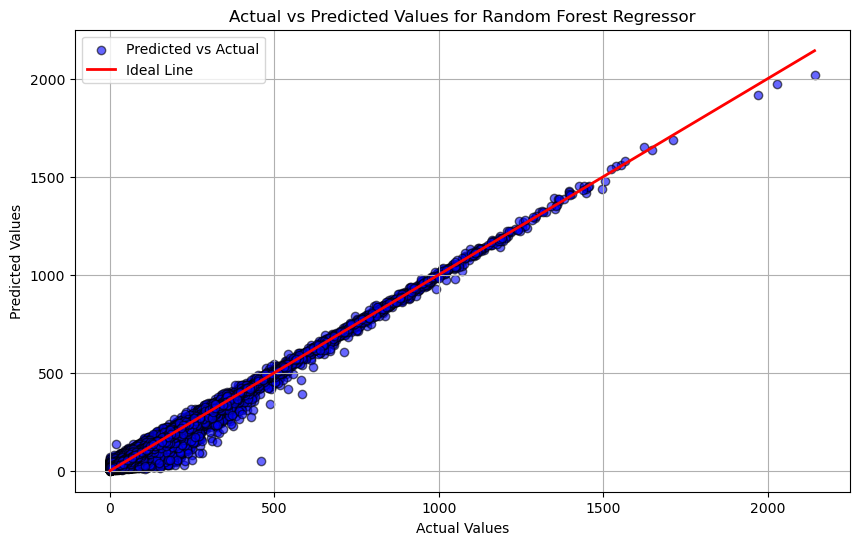

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y, rfr_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
rfr_pred = rfr_model.predict(X_test)

In [52]:
mae = mean_absolute_error(y_test, rfr_pred)
mse = mean_squared_error(y_test, rfr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 12.94850977107717
Mean Squared Error (MSE): 328.5659456401415
Root Mean Squared Error (RMSE): 18.126388102436223
R-squared (R²): 0.9458698671775737


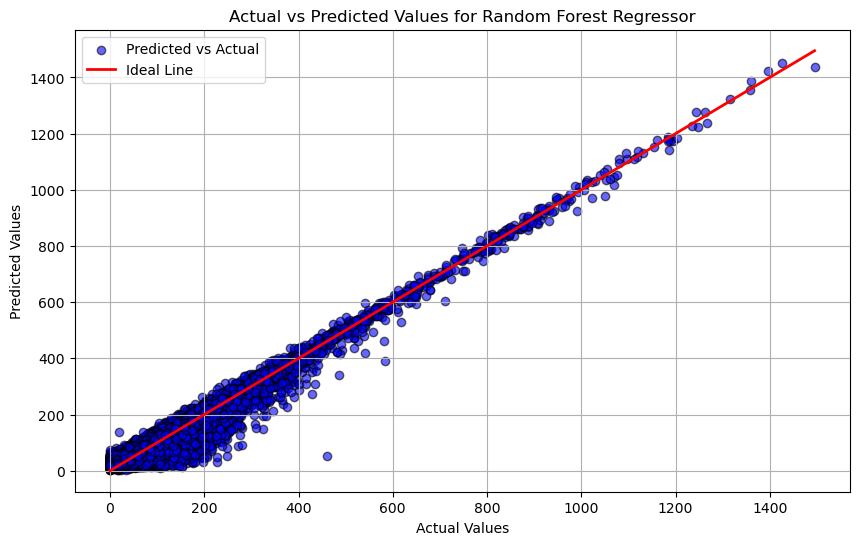

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rfr_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()

**XGBoost Regressor**

In [53]:
print("Starting with XGBoostRegressor")
xgb_model = xgb.XGBRegressor()  
print("Running XGBoostRegressor")
xgb_model.fit(X_train, y_train)  
print("Predicting with XGBoostRegressor")
xgb_pred = xgb_model.predict(X_test) 
print("Completed with XGBoostRegressor")

Starting with XGBoostRegressor
Running XGBoostRegressor
Predicting with XGBoostRegressor
Completed with XGBoostRegressor


In [54]:
xgb_model.score(X_test,y_test)

0.9218876610384281

In [55]:
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 12.927944530351906
Mean Squared Error (MSE): 474.13618217539283
Root Mean Squared Error (RMSE): 21.77466835971085
R-squared (R²): 0.9218876610384281


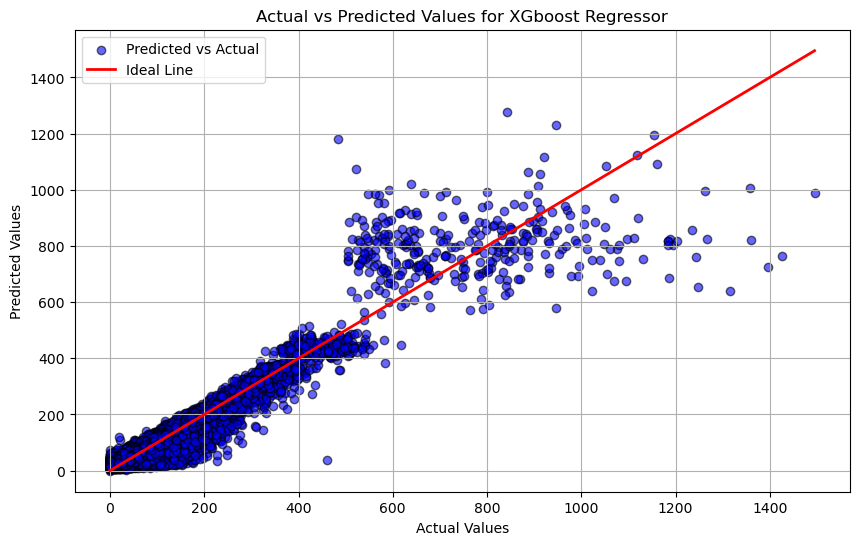

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for XGboost Regressor')
plt.legend()
plt.grid(True)
plt.show()

**Predicting for the overall dataset using Extra trees Regressor**

In [107]:
etrpred = etrmodel.predict(X)

In [108]:
etrmodel.score(X,y)

0.9841398599195064

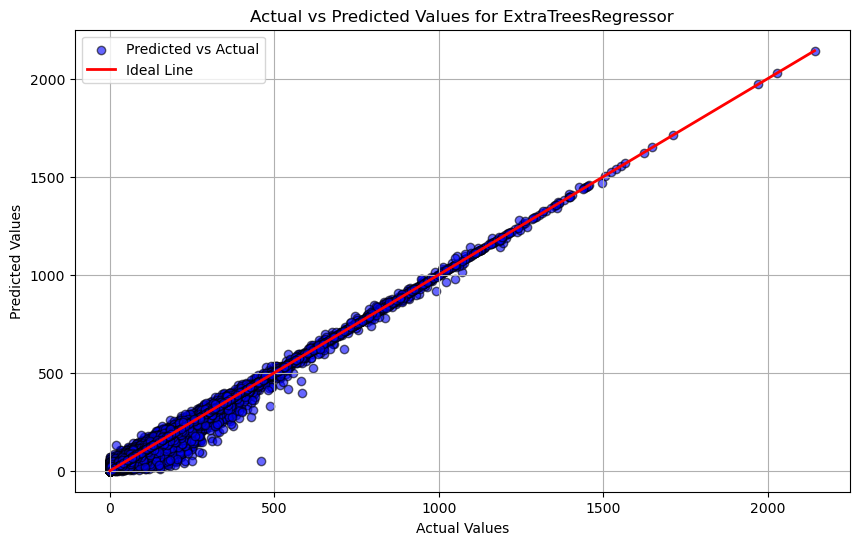

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(y, etrpred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for ExtraTreesRegressor')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
mae = mean_absolute_error(y, etrpred)
mse = mean_squared_error(y, etrpred)
rmse = np.sqrt(mse)
r2 = r2_score(y, etrpred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 3.904533286716977
Mean Squared Error (MSE): 99.56423315428916
Root Mean Squared Error (RMSE): 9.978187869262092
R-squared (R²): 0.9841398599195064


In [60]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,2,10397,13930,31.0,2019,17.0,1900,0.067797,0.727778,0.031915,0.0,0.5,0.596774,0.86,0.711340,0.582192,0.814433,1
1,2017,12,3,12892,14107,26.0,2029,32.0,1800,0.169492,0.669444,0.010638,0.0,0.5,0.483871,0.52,0.721649,0.554795,0.917526,1
2,2017,12,3,14771,12892,341.0,930,325.0,800,0.135593,0.886111,0.000000,0.0,0.5,0.612903,0.02,0.608247,0.493151,0.752577,1
3,2017,12,3,14771,14747,311.0,1440,286.0,1200,0.186441,0.908333,0.000000,0.0,0.5,0.645161,0.00,0.597938,0.513699,0.659794,1
4,2017,12,3,12892,14771,24.0,1836,5.0,1700,0.186441,0.652778,0.010638,0.0,0.5,0.500000,0.53,0.721649,0.561644,0.907216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303179,2016,1,3,10397,11292,33.0,10,5.0,2200,0.220339,0.844444,0.000000,0.0,0.5,0.548387,0.28,0.515464,0.445205,0.670103,1
303180,2016,1,3,13303,10397,26.0,2132,30.0,1900,0.152542,0.586111,0.223404,0.0,0.5,0.451613,0.69,0.886598,0.712329,0.762887,1
303181,2016,1,3,14107,11292,42.0,2259,39.0,2100,0.288136,0.211111,0.031915,0.0,0.5,0.467742,0.99,0.546392,0.595890,0.402062,1
303182,2016,1,3,11292,14107,58.0,2024,53.0,1900,0.084746,0.480556,0.521277,0.0,0.0,0.758065,1.00,0.402062,0.308219,1.000000,1


In [63]:
etrpred

array([ 25.95,  32.  , 325.  , ...,  39.  ,  53.  ,  67.  ])

In [64]:
y

0          17.0
1          32.0
2         325.0
3         286.0
4           5.0
          ...  
303179      5.0
303180     30.0
303181     39.0
303182     53.0
303183     67.0
Name: ArrDelayMinutes, Length: 303184, dtype: float64

In [65]:
dfnew = df

In [66]:
dfnew

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,2,10397,13930,31.0,2019,17.0,1900,0.067797,0.727778,0.031915,0.0,0.5,0.596774,0.86,0.711340,0.582192,0.814433,1
1,2017,12,3,12892,14107,26.0,2029,32.0,1800,0.169492,0.669444,0.010638,0.0,0.5,0.483871,0.52,0.721649,0.554795,0.917526,1
2,2017,12,3,14771,12892,341.0,930,325.0,800,0.135593,0.886111,0.000000,0.0,0.5,0.612903,0.02,0.608247,0.493151,0.752577,1
3,2017,12,3,14771,14747,311.0,1440,286.0,1200,0.186441,0.908333,0.000000,0.0,0.5,0.645161,0.00,0.597938,0.513699,0.659794,1
4,2017,12,3,12892,14771,24.0,1836,5.0,1700,0.186441,0.652778,0.010638,0.0,0.5,0.500000,0.53,0.721649,0.561644,0.907216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303179,2016,1,3,10397,11292,33.0,10,5.0,2200,0.220339,0.844444,0.000000,0.0,0.5,0.548387,0.28,0.515464,0.445205,0.670103,1
303180,2016,1,3,13303,10397,26.0,2132,30.0,1900,0.152542,0.586111,0.223404,0.0,0.5,0.451613,0.69,0.886598,0.712329,0.762887,1
303181,2016,1,3,14107,11292,42.0,2259,39.0,2100,0.288136,0.211111,0.031915,0.0,0.5,0.467742,0.99,0.546392,0.595890,0.402062,1
303182,2016,1,3,11292,14107,58.0,2024,53.0,1900,0.084746,0.480556,0.521277,0.0,0.0,0.758065,1.00,0.402062,0.308219,1.000000,1


In [67]:
dfnew['pred_minutes'] = etrpred

In [68]:
dfnew['pred_minutes']

0          25.95
1          32.00
2         325.00
3         307.88
4           5.00
           ...  
303179      5.00
303180     30.00
303181     39.00
303182     53.00
303183     67.00
Name: pred_minutes, Length: 303184, dtype: float64

In [69]:
actual_delay = dfnew['ArrDelayMinutes']
predicted_delay = dfnew['pred_minutes']

In [70]:
actual_delay,predicted_delay

(0          17.0
 1          32.0
 2         325.0
 3         286.0
 4           5.0
           ...  
 303179      5.0
 303180     30.0
 303181     39.0
 303182     53.0
 303183     67.0
 Name: ArrDelayMinutes, Length: 303184, dtype: float64,
 0          25.95
 1          32.00
 2         325.00
 3         307.88
 4           5.00
            ...  
 303179      5.00
 303180     30.00
 303181     39.00
 303182     53.00
 303183     67.00
 Name: pred_minutes, Length: 303184, dtype: float64)

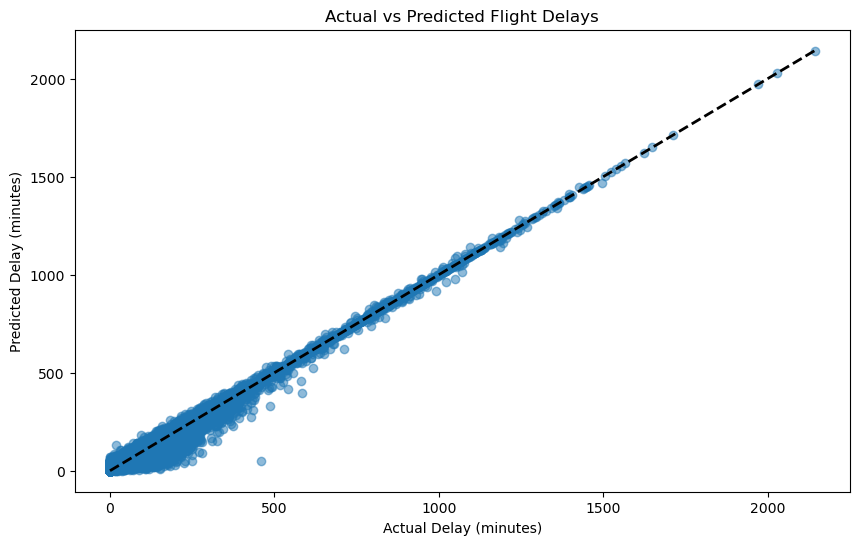

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(actual_delay, predicted_delay, alpha=0.5)
plt.plot([actual_delay.min(), actual_delay.max()], [actual_delay.min(), actual_delay.max()], 'k--', lw=2)
plt.xlabel('Actual Delay (minutes)')
plt.ylabel('Predicted Delay (minutes)')
plt.title('Actual vs Predicted Flight Delays')
plt.show()

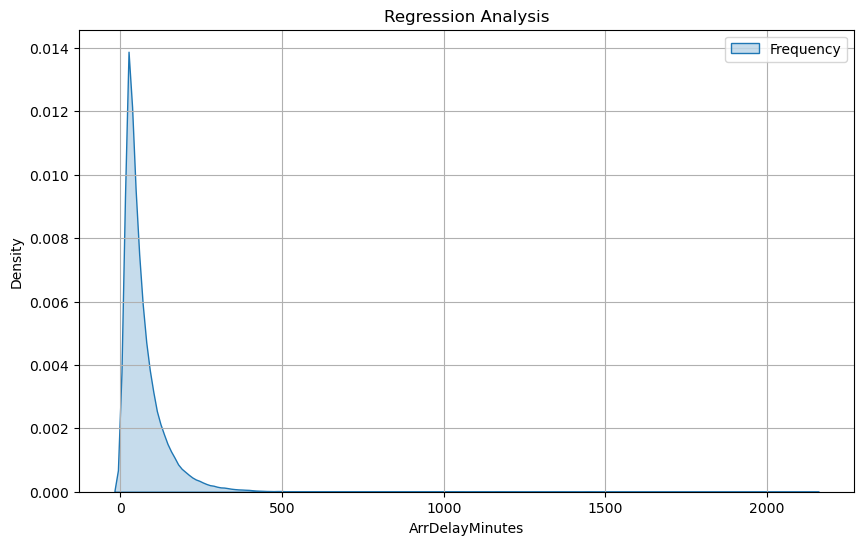

In [82]:
# Assuming your DataFrame has a column 'ArrDelayMinutes' for arrival delay in minutes
plt.figure(figsize=(10, 6))
sns.kdeplot(dfnew['pred_minutes'], fill=True, label='Frequency')
plt.title('Regression Analysis')
plt.xlabel('ArrDelayMinutes')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

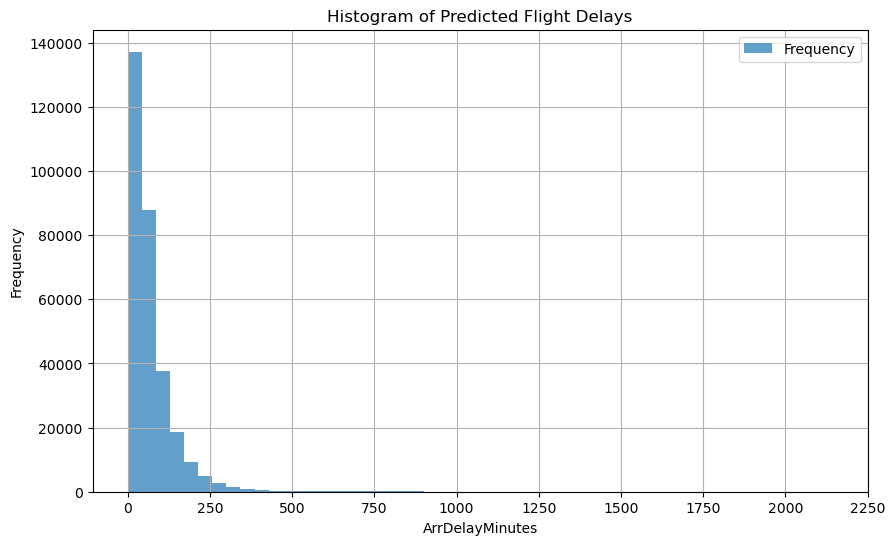

In [103]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(dfnew['pred_minutes'], bins=50, alpha=0.7, label='Frequency')

# Set title and labels
plt.title('Histogram of Predicted Flight Delays')
plt.xlabel('ArrDelayMinutes')
plt.ylabel('Frequency')
plt.legend()

# Set x-axis ticks to increase by 250
plt.xticks(range(0, int(dfnew['pred_minutes'].max()) + 250, 250))

# Add grid
plt.grid(True)

# Show the plot
plt.show()

In [115]:
count1 = 0
count2 = 0 
count3 = 0 
count4 = 0 
count5 = 0
for i in dfnew['pred_minutes'] : 
    if i >= 0 and i < 50 :
        count1 += 1
    if i >= 50 and i < 100 :
        count2 += 1
    if i >= 100 and i < 200 :
        count3 += 1
    if i >= 200 and i < 500 :
        count4 += 1
    if i >= 500 and i < 800 :
        count5 += 1
print(count1,count2,count3,count4,count5)

157837 82923 47241 13914 808


In [126]:
bins = [0, 50, 100, 200, 500, 900 , np.inf]
labels = ['0-50', '50-100', '100-200', '200-500', '500-900','900+']
df['delay_category'] = pd.cut(df['pred_minutes'], bins=bins, labels=labels, include_lowest=True)
flight_counts = df['delay_category'].value_counts().sort_index()

print("Number of flights in each interval:")
print(flight_counts)

metrics = []

for category in labels:
    category_df = df[df['delay_category'] == category]
    
    actual = category_df['ArrDelayMinutes']
    predicted = category_df['pred_minutes']
    
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    metrics.append({
        'Category': category,
        'Count': len(category_df),
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })
results_df = pd.DataFrame(metrics)

print("\nEvaluation Metrics for Each Interval:")
print(results_df.to_string(index=False))

Number of flights in each interval:
delay_category
0-50       159688
50-100      81787
100-200     46656
200-500     13786
500-900       987
900+          280
Name: count, dtype: int64

Evaluation Metrics for Each Interval:
Category  Count      MAE        MSE      RMSE
    0-50 159688 3.626527  83.239699  9.123579
  50-100  81787 4.087121 109.789254 10.478037
 100-200  46656 4.299886 123.726659 11.123249
 200-500  13786 4.660325 144.148172 12.006172
 500-900    987 4.184174 111.463322 10.557619
    900+    280 5.047536 159.770021 12.640017


In [128]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'CRSArrTime', 'ArrDelayMinutes', 'Time',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindChillF',
       'humidity', 'pred_del', 'pred_minutes', 'interval', 'delay_category'],
      dtype='object')

In [134]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,...,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del,pred_minutes,interval,delay_category
0,2017,12,2,10397,13930,31.0,2019,17.0,1900,0.067797,...,0.5,0.596774,0.86,0.711340,0.582192,0.814433,1,25.95,0.0-238.0,0-50
1,2017,12,3,12892,14107,26.0,2029,32.0,1800,0.169492,...,0.5,0.483871,0.52,0.721649,0.554795,0.917526,1,32.00,0.0-238.0,0-50
2,2017,12,3,14771,12892,341.0,930,325.0,800,0.135593,...,0.5,0.612903,0.02,0.608247,0.493151,0.752577,1,325.00,238.0-476.0,200-500
3,2017,12,3,14771,14747,311.0,1440,286.0,1200,0.186441,...,0.5,0.645161,0.00,0.597938,0.513699,0.659794,1,307.88,238.0-476.0,200-500
4,2017,12,3,12892,14771,24.0,1836,5.0,1700,0.186441,...,0.5,0.500000,0.53,0.721649,0.561644,0.907216,1,5.00,0.0-238.0,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303179,2016,1,3,10397,11292,33.0,10,5.0,2200,0.220339,...,0.5,0.548387,0.28,0.515464,0.445205,0.670103,1,5.00,0.0-238.0,0-50
303180,2016,1,3,13303,10397,26.0,2132,30.0,1900,0.152542,...,0.5,0.451613,0.69,0.886598,0.712329,0.762887,1,30.00,0.0-238.0,0-50
303181,2016,1,3,14107,11292,42.0,2259,39.0,2100,0.288136,...,0.5,0.467742,0.99,0.546392,0.595890,0.402062,1,39.00,0.0-238.0,0-50
303182,2016,1,3,11292,14107,58.0,2024,53.0,1900,0.084746,...,0.0,0.758065,1.00,0.402062,0.308219,1.000000,1,53.00,0.0-238.0,50-100


In [138]:
bins = [0, 50, 100, 200, 400, 800, np.inf]
labels = ['0-50', '50-100', '100-200', '200-400', '400-800', '800+']

df['delay_category'] = pd.cut(df['ArrDelayMinutes'], bins=bins, labels=labels, include_lowest=True)

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

features = ['Month', 'DayofMonth', 'DepDelayMinutes', 'CRSArrTime', 'Time',
            'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
            'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindChillF',
            'humidity']

results = []

for category in labels:
    category_df = df[df['delay_category'] == category]
    
    if len(category_df) > 0:
        X = category_df[features]
        y = category_df['ArrDelayMinutes']
        
        mae, mse, rmse = train_and_evaluate(X, y)
        
        results.append({
            'Category': category,
            'Count': len(category_df),
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse
        })
results_df = pd.DataFrame(results)
print("Evaluation Metrics for Each Interval:")
print(results_df.to_string(index=False))

Evaluation Metrics for Each Interval:
Category  Count       MAE        MSE      RMSE
    0-50 159163  8.889951 123.709669 11.122485
  50-100  81775  9.373064 133.092989 11.536593
 100-200  47016 14.728534 349.720236 18.700808
 200-400  13085 18.818398 631.225131 25.124194
 400-800   1686 19.496802 819.033326 28.618758
    800+    459 14.790021 402.107003 20.052606
